라벨 propa 
- https://jaeyung1001.tistory.com/89
- https://frhyme.github.io/python-libs/sklearn_semi_supervised_learning/
- https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html

In [1]:
import pandas as pd
df = pd.read_csv('ai허브6백만개_csv' )
df['new_token'] = df['tokenized2'].apply(lambda x: x.replace("'","").replace('[','').replace(']',''))
df['split_token'] = df['new_token'].apply(lambda x: x.split(', '))

In [4]:
df.to_csv('ai허브6백만개_재취합.csv', index=False)

# FastText 모델 학습

In [10]:
from gensim.test.utils import common_texts
from gensim.models import FastText
target = df['split_token'].tolist()
ft_model = FastText(target, size=100, window=2, min_count=10)

In [11]:
ft_model.save('fasstext_6.model')

In [28]:
vocabs = ft_model.wv.vocab.keys()
word_vectors_list = [ft_model.wv[v] for v in vocabs]

In [31]:
ft_model.similar_by_vector('ㅅㅂ',topn=1000 )

<ipython-input-31-325570201ab8>:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  ft_model.similar_by_vector('ㅅㅂ',topn=1000 )


[('땐', 0.38000941276550293),
 ('인해서', 0.3713245391845703),
 ('임한다면', 0.36613327264785767),
 ('후계', 0.3617332875728607),
 ('는다지만', 0.36099371314048767),
 ('노라면', 0.36079952120780945),
 ('변한다면', 0.3575935959815979),
 ('비한다면', 0.3561621308326721),
 ('편다면', 0.3544091582298279),
 ('망한다면', 0.35258030891418457),
 ('뽑힌다면', 0.34997236728668213),
 ('택한다면', 0.3495805859565735),
 ('됏다면', 0.3486664295196533),
 ('고른다면', 0.3474113345146179),
 ('렇다면', 0.3470720648765564),
 ('어도', 0.34462839365005493),
 ('기에', 0.3442440629005432),
 ('을지라도', 0.3436869978904724),
 ('간다지만', 0.34310322999954224),
 ('싸운다면', 0.3426186144351959),
 ('속일지라도', 0.34214580059051514),
 ('지켜준다면', 0.3417230546474457),
 ('갖춘다면', 0.3410261869430542),
 ('내세운다면', 0.34055185317993164),
 ('정한다면', 0.3399045765399933),
 ('다지만', 0.3394811153411865),
 ('떄', 0.33914920687675476),
 ('봣다면', 0.33899572491645813),
 ('이어진다면', 0.3371213972568512),
 ('돈다면', 0.33660760521888733),
 ('탄다면', 0.33633482456207275),
 ('피한다면', 0.3357158899307251),
 ('판다면', 0.

In [47]:
ft_model.wv.similarity('시발', 'ㅆㅂ')

0.86163294

In [48]:
ft_model.wv.similarity('시발', 'ㅅㅂ') #없는 단어에 대해서는 약한 유사도

-0.055591334

# 임베딩 프로젝터

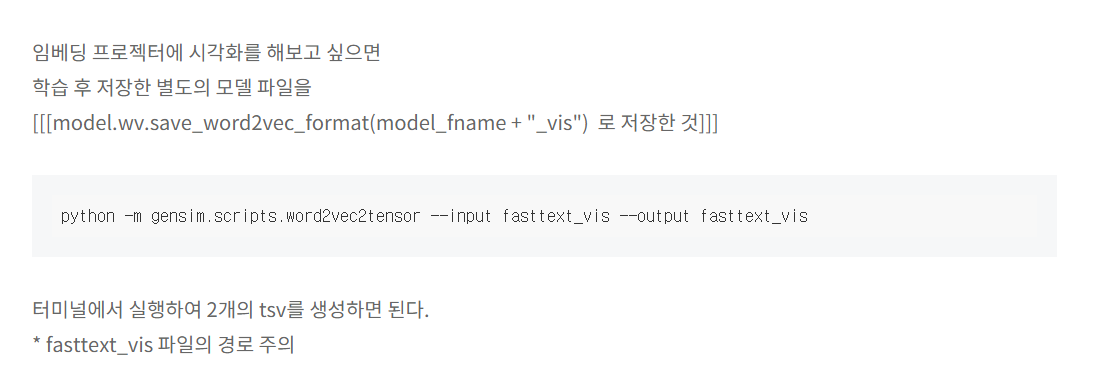

In [12]:

# https://projector.tensorflow.org/ 에서 시각화 하기 위해 모델을 따로 저장 
ft_model.wv.save_word2vec_format("fasstext_6.model_vis")

In [22]:
!python -m gensim.scripts.word2vec2tensor --input fasstext_6.model_vis --output fasstext_6.model_vis

2021-04-03 15:30:26,664 - word2vec2tensor - INFO - running C:\Users\rlagy\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input fasstext_6.model_vis --output fasstext_6.model_vis
2021-04-03 15:30:26,664 - utils_any2vec - INFO - loading projection weights from fasstext_6.model_vis
2021-04-03 15:30:35,836 - utils_any2vec - INFO - loaded (93242, 100) matrix from fasstext_6.model_vis
2021-04-03 15:30:42,646 - word2vec2tensor - INFO - 2D tensor file saved to fasstext_6.model_vis_tensor.tsv
2021-04-03 15:30:42,646 - word2vec2tensor - INFO - Tensor metadata file saved to fasstext_6.model_vis_metadata.tsv
2021-04-03 15:30:42,664 - word2vec2tensor - INFO - finished running word2vec2tensor.py
